Original Data_type is <dtype: 'float32'>
Kernel_sz1 = tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
Data_type is <dtype: 'float32'>
Image Size is (1, 800, 500, 1)
Image min and max are (0.0, 255.0)


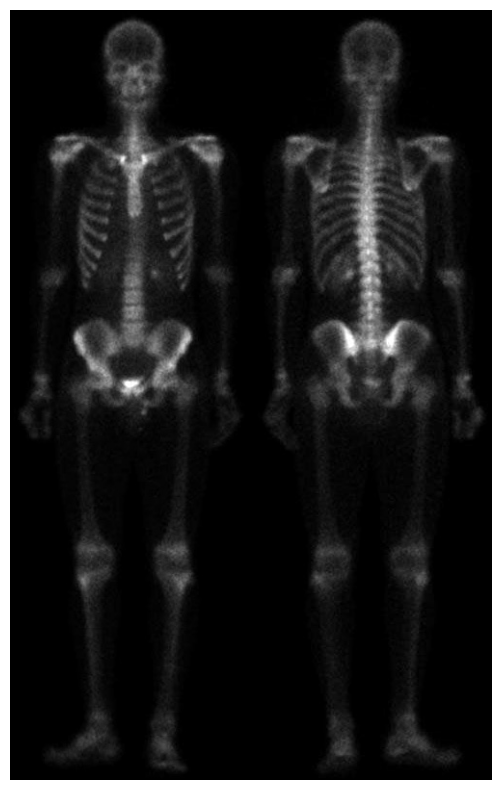

Laplacian Filtered Data_type is <dtype: 'float32'>
Laplacian Filtered Image Size is (1, 1, 800, 500, 1)
Laplacian Filtered Image min and max are (-208.0, 208.0)


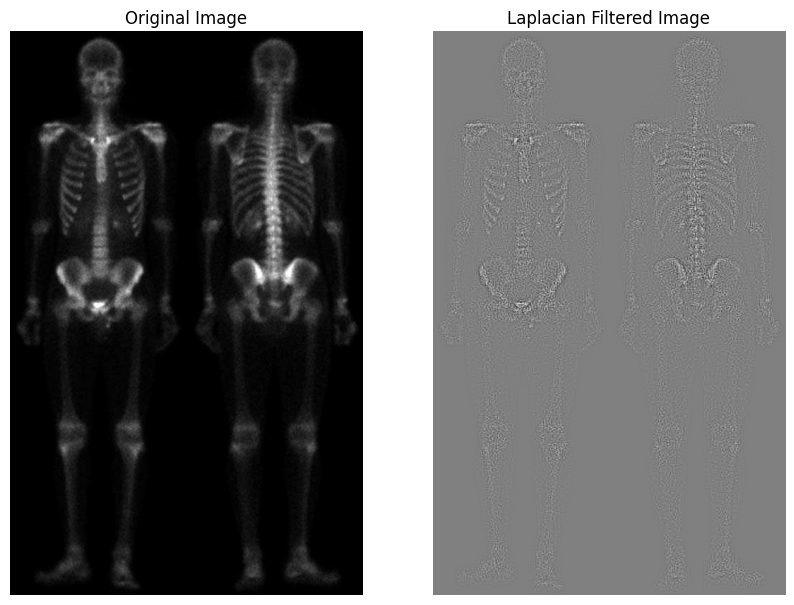

Sharpened Image Data_type is <dtype: 'float32'>
Sharpened Image Size is (1, 1, 800, 500, 1)
Sharpened Image min and max are (-35.0, 331.0)


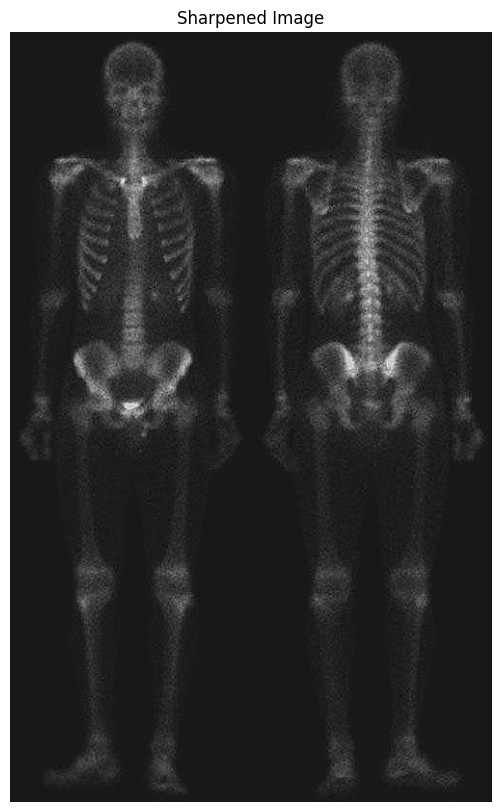

Sobel Gradient Data_type is <dtype: 'float32'>
Sobel Gradient Size is (1, 1, 800, 500, 1)
Sobel Gradient min and max are (0.0, 459.1840515136719)


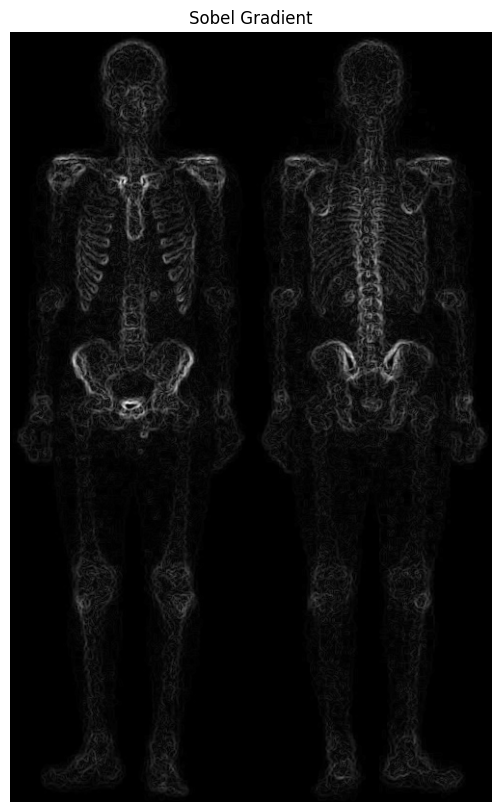

Smoothed Sobel Gradient Data_type is <dtype: 'float32'>
Smoothed Sobel Gradient Size is (1, 1, 1, 800, 500, 1)
Smoothed Sobel Gradient min and max are (0.0, 292.638916015625)


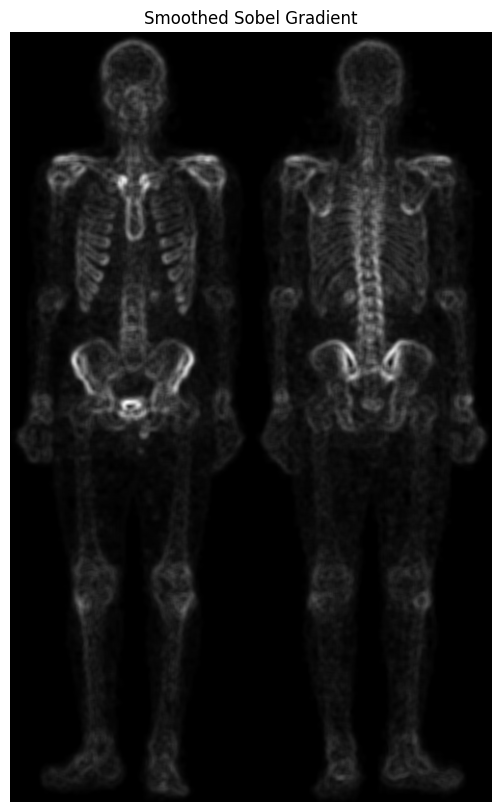

Mask Image Data_type is <dtype: 'float32'>
Mask Image Size is (1, 1, 1, 800, 500, 1)
Mask Image min and max are (-3595.00830078125, 83256.0625)


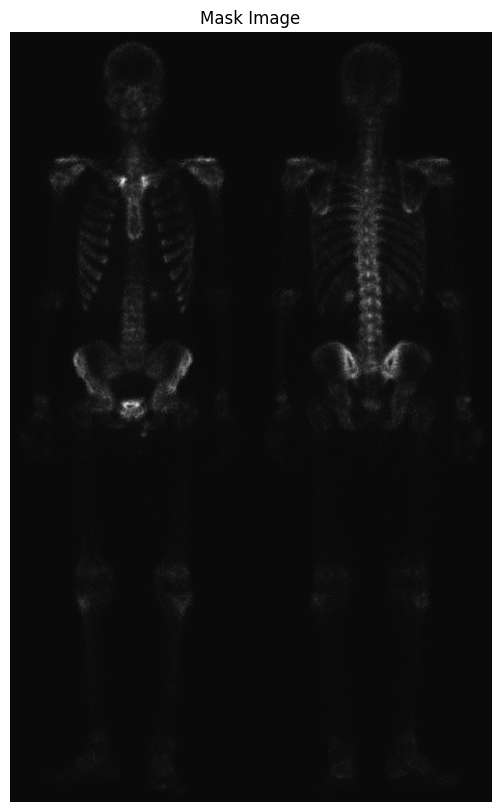

Sharpened Image Data_type is <dtype: 'float32'>
Sharpened Image Size is (1, 1, 1, 800, 500, 1)
Sharpened Image min and max are (-3559.00830078125, 83506.0625)


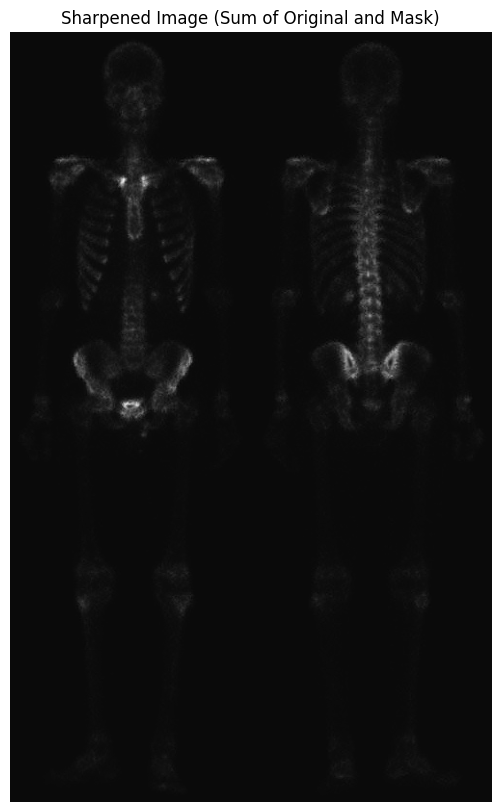

Final Result Data_type is <dtype: 'float32'>
Final Result Size is (1, 1, 1, 800, 500, 1)
Final Result min and max are (nan, nan)


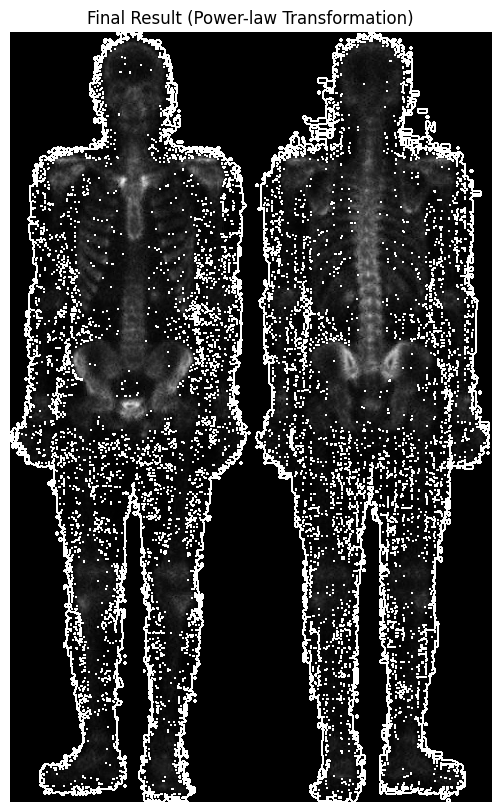

In [14]:
import tensorflow as tf
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
img_path = '/content/skeleton_orig.tif'
img = imageio.imread(img_path)
img = tf.convert_to_tensor(img, dtype=tf.float32)
kernel_sz1 = tf.ones((1, 1), dtype=tf.float32)
img_a = tf.cast(img, tf.float32) 
img_a = tf.nn.conv2d( tf.reshape(img_a, (1,img_a.shape[0],img_a.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')
print('Original Data_type is', img.dtype)
print('Kernel_sz1 =', kernel_sz1)
print('Data_type is', img_a.dtype)
print('Image Size is', img_a.shape)
print('Image min and max are ({}, {})'.format(tf.reduce_min(img_a),\
                                              tf.reduce_max(img_a)))
plt.figure(figsize=(10,10))
plt.imshow(tf.squeeze(img_a), cmap='gray')
plt.axis('off')
plt.show()
laplacian_kernel = tf.constant([[-1, -1, -1],
                                [-1,  8, -1],
                                [-1, -1, -1]], dtype=tf.float32)

laplacian_img = tf.nn.conv2d(tf.expand_dims(img_a, axis=0),
                             tf.expand_dims(tf.expand_dims(laplacian_kernel, axis=-1), axis=-1),
                             strides=[1, 1, 1, 1],
                             padding='SAME')

print('Laplacian Filtered Data_type is', laplacian_img.dtype)
print('Laplacian Filtered Image Size is', laplacian_img.shape)
print('Laplacian Filtered Image min and max are ({}, {})'.format(tf.reduce_min(laplacian_img),
                                                                  tf.reduce_max(laplacian_img)))

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(img_a), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(laplacian_img), cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')

plt.show()
sharpen_kernel = tf.constant([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]], dtype=tf.float32)

sharpened_img = tf.nn.conv2d(tf.expand_dims(img_a, axis=0),
                              tf.expand_dims(tf.expand_dims(sharpen_kernel, axis=-1), axis=-1),
                              strides=[1, 1, 1, 1],
                              padding='SAME')

print('Sharpened Image Data_type is', sharpened_img.dtype)
print('Sharpened Image Size is', sharpened_img.shape)
print('Sharpened Image min and max are ({}, {})'.format(tf.reduce_min(sharpened_img),
                                                         tf.reduce_max(sharpened_img)))

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sharpened_img), cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
plt.show()
sobel_x = tf.constant([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=tf.float32)
sobel_y = tf.constant([[-1, -2, -1],
                       [0, 0, 0],
                       [1, 2, 1]], dtype=tf.float32)

gradient_x = tf.nn.conv2d(tf.expand_dims(img_a, axis=0),
                           tf.expand_dims(tf.expand_dims(sobel_x, axis=-1), axis=-1),
                           strides=[1, 1, 1, 1],
                           padding='SAME')
gradient_y = tf.nn.conv2d(tf.expand_dims(img_a, axis=0),
                           tf.expand_dims(tf.expand_dims(sobel_y, axis=-1), axis=-1),
                           strides=[1, 1, 1, 1],
                           padding='SAME')

sobel_gradient = tf.sqrt(tf.square(gradient_x) + tf.square(gradient_y))

print('Sobel Gradient Data_type is', sobel_gradient.dtype)
print('Sobel Gradient Size is', sobel_gradient.shape)
print('Sobel Gradient min and max are ({}, {})'.format(tf.reduce_min(sobel_gradient),
                                                       tf.reduce_max(sobel_gradient)))

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sobel_gradient), cmap='gray')
plt.title('Sobel Gradient')
plt.axis('off')
plt.show()
avg_filter = tf.constant([[1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1]], dtype=tf.float32) / 25.0

smoothed_sobel_gradient = tf.nn.conv2d(tf.expand_dims(sobel_gradient, axis=0),
                                       tf.expand_dims(tf.expand_dims(avg_filter, axis=-1), axis=-1),
                                       strides=[1, 1, 1, 1],
                                       padding='SAME')

print('Smoothed Sobel Gradient Data_type is', smoothed_sobel_gradient.dtype)
print('Smoothed Sobel Gradient Size is', smoothed_sobel_gradient.shape)
print('Smoothed Sobel Gradient min and max are ({}, {})'.format(tf.reduce_min(smoothed_sobel_gradient),
                                                                tf.reduce_max(smoothed_sobel_gradient)))

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(smoothed_sobel_gradient), cmap='gray')
plt.title('Smoothed Sobel Gradient')
plt.axis('off')
plt.show()
mask_image = sharpened_img * smoothed_sobel_gradient

print('Mask Image Data_type is', mask_image.dtype)
print('Mask Image Size is', mask_image.shape)
print('Mask Image min and max are ({}, {})'.format(tf.reduce_min(mask_image),
                                                   tf.reduce_max(mask_image)))

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(mask_image), cmap='gray')
plt.title('Mask Image')
plt.axis('off')
plt.show()
sharpened_image = img_a + mask_image

print('Sharpened Image Data_type is', sharpened_image.dtype)
print('Sharpened Image Size is', sharpened_image.shape)
print('Sharpened Image min and max are ({}, {})'.format(tf.reduce_min(sharpened_image),
                                                        tf.reduce_max(sharpened_image)))

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sharpened_image), cmap='gray')
plt.title('Sharpened Image (Sum of Original and Mask)')
plt.axis('off')
plt.show()
gamma = 0.6

final_result = tf.pow(sharpened_image, gamma)

print('Final Result Data_type is', final_result.dtype)
print('Final Result Size is', final_result.shape)
print('Final Result min and max are ({}, {})'.format(tf.reduce_min(final_result),
                                                     tf.reduce_max(final_result)))

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(final_result), cmap='gray')
plt.title('Final Result (Power-law Transformation)')
plt.axis('off')
plt.show()


Observations on Image Enhancement Progression:

1. Smoothing and Sharpening: Initially, a 1x1 averaging filter was used to smooth the image (part a)), which minimizes noise and softens fine details. In part c), the smoothed image underwent sharpening via a specific kernel. Sharpening accentuates edges and features, rendering them more distinct.

2. Gradient and Edge Detection: In part d), the original image was subjected to Sobel gradient analysis to identify edges and gradients effectively. This process illuminates areas of significant intensity change, essentially outlining edges within the image.

3. Mask Formation: The mask image (part f)) was created by amalgamating the sharpened image (part c)) with the smoothed Sobel gradient image. This fusion emphasizes areas where both sharpening and edge detection operations had notable impacts, enhancing edges while mitigating noise.

4. Final Enhancement: A power-law transformation (part h)) was applied to the sharpened image from part g. This transformation amplifies the contrast in the image, thereby intensifying the prominence of edges and features.